The purpose of his project is to analyze Boston housing price database. Let's import our libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

Now Let's get data from CSV, and make some dataframes.

In [5]:
Boston_Housing_df = pd.read_csv('Boston_Housing_Price.csv', header=None, sep="\s+")
Boston_Housing_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Boston_Housing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Now Let's start EDA to check our data.

In [32]:
Boston_Housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A better way for EDA is to use Pandas profiling (recently called "ydata").
<br>
Lets import it and save the result into a .html file, then open it. The result will be saved in project directory. 
<br>
This file is really a good reference for selecting features with high amount of correlation with target and monitor missing values.

In [52]:
from ydata_profiling import ProfileReport

Report = ProfileReport(Boston_Housing_df)
Report.to_file('Boston.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 43.47it/s]


Now let'take all datasets as a sample and shuffle them.

In [7]:
Shuffled_Data = Boston_Housing_df.sample(frac=1)

Now Let's split 20% of data into test datasets and other 90% into train dataset.

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split (Shuffled_Data, test_size=0.2)

Now Let's evaluate the shapes of test and train datasets.

In [9]:
train.shape , test.shape

((404, 14), (102, 14))

Now let's select LSTAT column as x and and MEDV column as y and define them for both test and train datasets.

In [12]:
#All_Variables = Boston_Housing_df.drop("MEDV", axis=1)
x_train = train["LSTAT"]
y_train = train["MEDV"]
x_test  = test ["LSTAT"]
y_test  = test ["MEDV"]
type(x_train), type(y_train), x_train.shape, y_train.shape 

(pandas.core.series.Series, pandas.core.series.Series, (404,), (404,))

As you see the test and train's type is pandas.Series. we need to change it to a matrix before using it as a parameter of linear regression

In [13]:
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
x_test  = x_test .values.reshape(-1,1)  
y_test  = y_test .values.reshape(-1,1) 
type(x_train), type(y_train), x_train.shape, y_train.shape

(numpy.ndarray, numpy.ndarray, (404, 1), (404, 1))

Now let's import linear regression form Sklearn, make a new instant and fit it using our train data.

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now the model is fited. Let's evaluate the coef and intercept of the our regression line:
a = coef
, b = intercept
, y = ax +b

In [36]:
LR.coef_, LR.intercept_

(array([[-0.96681032]]), array([34.7434652]))

Now Let's predit using our regression model with our train dataset and call it yhat.

In [65]:
yhat_train = LR.predict(x_train)
yhat_test  = LR.predict(x_test)

yhat_train.shape , yhat_test. shape 

((404, 1), (102, 1))

Now let's make a figure and visualize it.

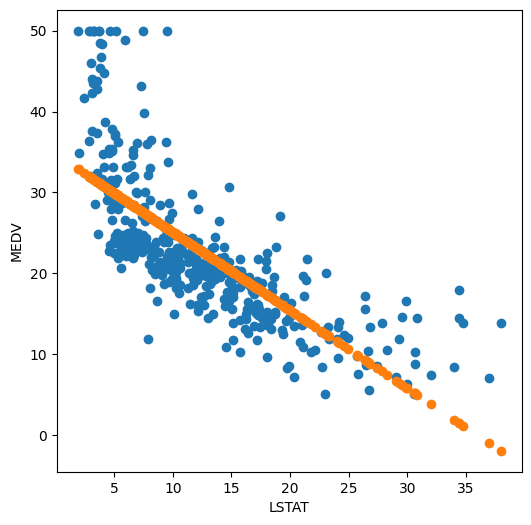

In [48]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')
ax.scatter (x_train, y_train)
ax.scatter (x_train, yhat_train)

Now let's calculate some metrcis to evaluate the errors between the y_train and yhat_train. We can do the same for test data:
<br>
MLE (Mean Squared Error)
<br>
RMSE (Root Mean Squared Error) 
<br>
MAE (Mean Absolute Error) 
<br>
R-Squared
<br>
<br>
If R_Squared = 1 => Model is doing perfect
<br>
If R_Squared = 0 => Model is doing terrible.

In [67]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

MSE  = mean_squared_error(y_train, yhat_train)
RMSE = root_mean_squared_error(y_train, yhat_train)
MAE  = mean_absolute_error(y_train, yhat_train) 
R_Squared = r2_score(y_train, yhat_train)

print ('MSE = ' ,MSE)
print ('RMSE = ',RMSE)
print ('MAE = ',MAE)
print ('R_Squared =',R_Squared )

MSE =  38.90168793302673
RMSE =  6.237121766730767
MAE =  4.54359487195088
R_Squared = 0.5466499417409952


## Multivariate
Now Let's make it a little harder.
Previously we only select LSTAT column as x. Now let's change our x into LSTAT, AGE and RM columns.
<br>
we do not need to change our them into a matrix before using them as a parameter of linear regression, cause they are already a matrix.

In [29]:
x_Cols = ["AGE","RM","LSTAT"]

x_train = train[x_Cols]
y_train = train["MEDV"]
x_test  = test [x_Cols]
y_test  = test ["MEDV"]
'''
x_train = x_train.values.reshape(-1,2)
y_train = y_train.values.reshape(-1,2)
x_test  = x_test .values.reshape(-1,2)  
y_test  = y_test .values.reshape(-1,2) 
'''
type(x_train), type(y_train), x_train.shape, y_train.shape

(pandas.core.frame.DataFrame, pandas.core.series.Series, (404, 3), (404,))

Now let's import linear regression form Sklearn, make a new instant and fit it using our train data.
<br>
Then predit using our train dataset.

In [30]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)
yhat_train = LR.predict(x_train)
yhat_test  = LR.predict(x_test)

Now let's calculate R_Squared to evaluate the errors between the y_train and yhat_train. We can see that the R_Square has increased from the perious amount, and that's a good sign.

In [31]:
LR.score(x_train,y_train)

0.6380774837847081

## Normalizing Dataset before using (Preprocessing)
Sometime we need to normalize dataset because:
<br>
- It optimize the optimization process.
-  It help to realize the importance of each feature by checking their weights at the end.
-  Some algorithms need nomalization as a requirement before starting.
<br>
<br> There are three method for normalizing:
1) Min-Max scaler
2) Standard scaler
3) Robust scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


Now at first let's use StandardScaler.

In [39]:
Scaler = StandardScaler()
x_train_new = Scaler.fit_transform(x_train)
x_test_new  = Scaler.transform(x_test)

Now let's import linear regression form Sklearn, make a new instant and fit it using our train data.
<br>
Then predit using our train dataset.

In [40]:
LR = LinearRegression()
LR.fit(x_train_new,y_train)
yhat_train = LR.predict(x_train_new)
yhat_test  = LR.predict(x_test_new)

Now let's calculate R_Squared to evaluate the errors between the y_train and yhat_train. In this case it did not change alot, but in real case it will.

In [42]:
LR.score(x_train_new,y_train)

0.6380774837847082

Now the model is fited. Let's evaluate the coef and intercept of the our regression line.

In [43]:
LR.coef_, LR.intercept_

(array([ 0.02934987,  3.3585676 , -4.62847421]), 22.48638613861386)

### Nonlinear Regression (Ridge Reggression)

One way to prevent model from overfitting is regularization. In ridge reggresion the alfa hyerparameter is for regularization. Hyperparameter is a kind of parameter that is added by us (forexample to regulate model) and it does not take any part in model optimization.
<br>
<br>
In order to find the best value for our hyperparameter, we need to split train test into two part: Train and Validation. So we will have three section in total: Train, Validation and test.
<br>
<br>
 Validation data is for finding the best hyperparameter value. For example, you set alfa equal to 1 and then train the model. Then we will use validation data to calculate the error for that hyperparameter. After that, we will change the value of hyperparameter and continue this loop to find the lowest amount of error which give us the best value for the hyperparameter. We call it "Hyperparameter Optimization".


Best practise:
It's better to have validation part, whether you have hyperparameter or not, because having another test data is always good, but you may shrink your train data.


## Cross validation 
Cross validation is a method which you split train data into some folds (parts), forexample five equal folds. Then you use one part as validation part and use others for model training. After that you select another fold to be as validation part and then train model again with others fold. We continue this way till all folds become once a validation part. Finally we will make an average of all these senarios. 
<br>
<br>
In this way our validation part become more dynamic and our training data won't shrink.
<br>
<br>
Now lets make a Linear regression and import Cross validation:

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict

LR = LinearRegression()

Now let's calculate R_Squared for a five folds training data

In [32]:
Score = cross_val_score(LR,x_train,y_train, cv=5)
Score

array([0.53624167, 0.55379448, 0.52712564, 0.46846176, 0.4965125 ])

Now let's calculate the mean of five folds.

In [33]:
Final_Score = Score.mean()
Final_Score

0.516427209604881

Now let's import Ridge Regression, and assume that alpha is 10. Then use Cross vallidation score to train model and get score.

In [34]:
from sklearn.linear_model import Ridge

RR = Ridge(alpha=10)
cross_val_score (RR, x_train, y_train, cv=5)

array([0.53614006, 0.5538498 , 0.52716952, 0.46843004, 0.49665794])

## Grid Search
Grid Search is another way to find the best value for hyperparameters. In this case we need to define the hyperparameter and it's values for grid search to find the best value for that.

Now let's import Grid Search Cross Validation to find the best value of alpha forexample from 0.1, 1, 10 with 5 folds. We need to define alpha and it's value as a dictionary: 

In [40]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(RR, {'alpha':[0.1,1,10,]}, cv=5)

Now let's fit the model

In [41]:
GS.fit(x_train,y_train)

,estimator,Ridge(alpha=10)
,param_grid,"{'alpha': [0.1, 1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


So we can continue as before and predict using the model.

In [44]:
yhat_train = GS.predict(x_train)
yhat_test  = GS.predict(x_test)